In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# 1. Find sec to day conversion factor.

In [2]:
SECONDS_PER_DAY = 60 * 60 * 24
SECONDS_PER_DAY

86400

# 2. Approximate total annual flow w/ Riemann sum.

In [3]:
flow_per_sec = np.array([
    1911.79, 2045.40, 2431.73, 2154.14,
    1592.73, 945.17, 669.46, 851.97,
    1107.30, 1325.12, 1551.70, 1766.33,
])

days = [
    31, 28.25, 31, 30, 31, 30,
    31, 31, 30, 31, 30, 31
]

In [4]:
data = pd.DataFrame({
    "days" : days,
    "daily_flow" : flow_per_sec * SECONDS_PER_DAY
})
data.index.name = "month"
data

,days,daily_flow
month,,
0,31.00,165178656.0
1,28.25,176722560.0
2,31.00,210101472.0
3,30.00,186117696.0
4,31.00,137611872.0
5,30.00,81662688.0
6,31.00,57841344.0
7,31.00,73610208.0
8,30.00,95670720.0


In [5]:
annual_flow_rect = np.sum(data["days"] * data["daily_flow"])
annual_flow_rect

48172741632.0

## Plot

In [6]:
from datetime import datetime

In [7]:
data["month_start"] = pd.Series([pd.to_datetime(datetime(year=2022, month=i, day=1)) for i in range(1, 13)])
data["month_end"] = data["month_start"] + pd.to_timedelta(data["days"], unit="D")
data

,days,daily_flow,month_start,month_end
month,,,,
0,31.00,165178656.0,2022-01-01,2022-02-01 00:00:00
1,28.25,176722560.0,2022-02-01,2022-03-01 06:00:00
2,31.00,210101472.0,2022-03-01,2022-04-01 00:00:00
3,30.00,186117696.0,2022-04-01,2022-05-01 00:00:00
4,31.00,137611872.0,2022-05-01,2022-06-01 00:00:00
5,30.00,81662688.0,2022-06-01,2022-07-01 00:00:00
6,31.00,57841344.0,2022-07-01,2022-08-01 00:00:00
7,31.00,73610208.0,2022-08-01,2022-09-01 00:00:00
8,30.00,95670720.0,2022-09-01,2022-10-01 00:00:00


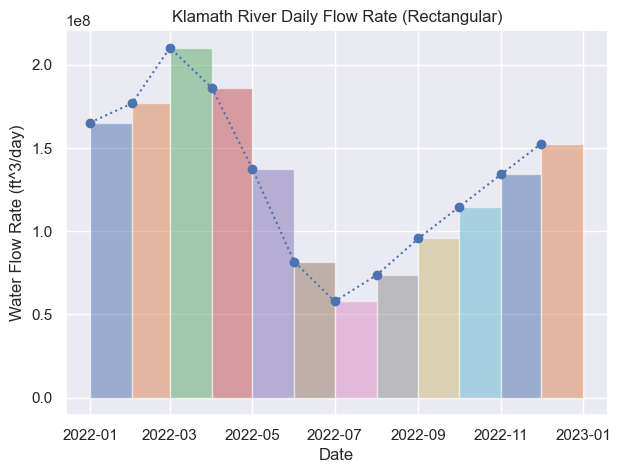

In [8]:
def plot_rect_approx(ax):
    ax.plot(data["month_start"], data["daily_flow"], "bo:")

    ax.set(
        title="Klamath River Daily Flow Rate (Rectangular)",
        xlabel="Date",
        ylabel="Water Flow Rate (ft^3/day)"
    )

    for n_month in range(12):
        month_start = data.loc[n_month, "month_start"]
        month_end = data.loc[n_month, "month_end"]

        x = [month_start, month_start, month_end, month_end]
        y = [0, data.loc[n_month, "daily_flow"], data.loc[n_month, "daily_flow"], 0]
        ax.fill(x, y, alpha=0.5)
        
fig, ax = plt.subplots(figsize=(7, 5))
plot_rect_approx(ax)

# 3. Plot monthly flow and use trapezoidial Riemann sum.

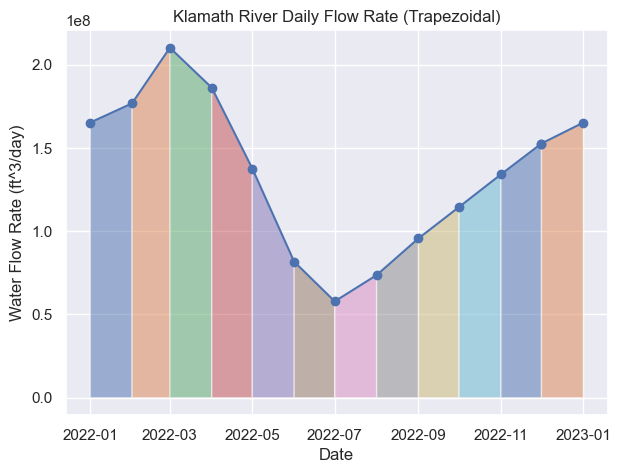

In [9]:
def plot_trap_approx(ax):
    ax.plot(data["month_start"], data["daily_flow"], "bo-")

    # Plot from Dec 1 to Jan 1.
    ax.plot(data.loc[11, ["month_start", "month_end"]], data.loc[[11, 0], "daily_flow"], "bo-")

    ax.set(
        title="Klamath River Daily Flow Rate (Trapezoidal)",
        xlabel="Date",
        ylabel="Water Flow Rate (ft^3/day)"
    )

    for n_month in range(12):
        month_start = data.loc[n_month, "month_start"]
        month_end = data.loc[n_month, "month_end"]

        x = [month_start, month_start, month_end, month_end]
        y = [0, data.loc[n_month, "daily_flow"], data.loc[(n_month + 1) % 12, "daily_flow"], 0]
        ax.fill(x, y, alpha=0.5)
        
fig, ax = plt.subplots(figsize=(7, 5))
plot_trap_approx(ax)

In [10]:
data

,days,daily_flow,month_start,month_end
month,,,,
0,31.00,165178656.0,2022-01-01,2022-02-01 00:00:00
1,28.25,176722560.0,2022-02-01,2022-03-01 06:00:00
2,31.00,210101472.0,2022-03-01,2022-04-01 00:00:00
3,30.00,186117696.0,2022-04-01,2022-05-01 00:00:00
4,31.00,137611872.0,2022-05-01,2022-06-01 00:00:00
5,30.00,81662688.0,2022-06-01,2022-07-01 00:00:00
6,31.00,57841344.0,2022-07-01,2022-08-01 00:00:00
7,31.00,73610208.0,2022-08-01,2022-09-01 00:00:00
8,30.00,95670720.0,2022-09-01,2022-10-01 00:00:00


In [11]:
flows = data["daily_flow"].values
flows

array([1.65178656e+08, 1.76722560e+08, 2.10101472e+08, 1.86117696e+08,
       1.37611872e+08, 8.16626880e+07, 5.78413440e+07, 7.36102080e+07,
       9.56707200e+07, 1.14490368e+08, 1.34066880e+08, 1.52610912e+08])

In [12]:
annual_flow_trap = np.sum(data["days"] * 0.5 * (flows + np.append(flows[1:], flows[0])))
annual_flow_trap

48144327372.0

# 4. Use daily flow as right endpoint.

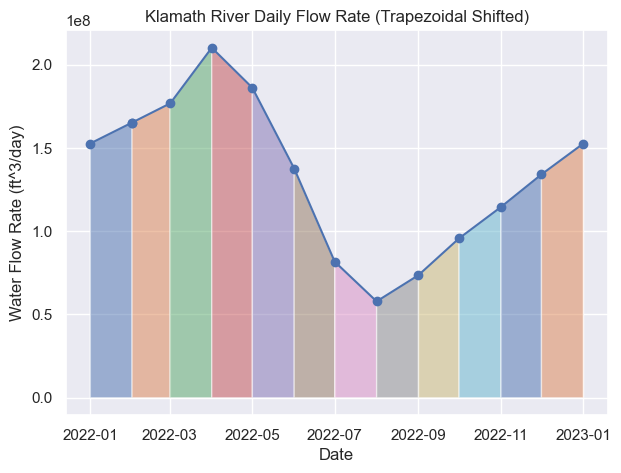

In [13]:
def plot_trap_shift_approx(ax):
    ax.plot(data["month_end"], data["daily_flow"], "bo-")

    # Plot from Jan 1 to Feb 1.
    ax.plot(data.loc[0, ["month_start", "month_end"]], data.loc[[11, 0], "daily_flow"], "bo-")

    ax.set(
        title="Klamath River Daily Flow Rate (Trapezoidal Shifted)",
        xlabel="Date",
        ylabel="Water Flow Rate (ft^3/day)"
    )

    for n_month in range(12):
        month_start = data.loc[n_month, "month_start"]
        month_end = data.loc[n_month, "month_end"]

        x = [month_start, month_start, month_end, month_end]
        y = [0, data.loc[(n_month - 1) % 12, "daily_flow"], data.loc[n_month, "daily_flow"], 0]
        ax.fill(x, y, alpha=0.5)
        
fig, ax = plt.subplots(figsize=(7, 5))
plot_trap_shift_approx(ax)

In [14]:
flows

array([1.65178656e+08, 1.76722560e+08, 2.10101472e+08, 1.86117696e+08,
       1.37611872e+08, 8.16626880e+07, 5.78413440e+07, 7.36102080e+07,
       9.56707200e+07, 1.14490368e+08, 1.34066880e+08, 1.52610912e+08])

In [15]:
annual_flow_trap_shift = np.sum(data["days"] * 0.5 * (np.append(flows[-1], flows[0 : -1]) + flows))
annual_flow_trap_shift

48169466532.0

# 5. Justify the extra point.

        The monthly flow rate for January is calculated by month length * 1/2 * (start flow + end flow). For all months but December, the end flow is just the flow rate for the next month. However, since December is the last month in the year and there is no next point, we have to use the flow rate for the next month January, wrapping the calendar around to get the end point. This makes sense, since December ends with the start of January of the next year.
        For the shifted trapezoidal approximation, the start and end flows during January are the December flow rate and the January flow rate respectively. This means that we have to add the measurement from December of the previous year, which makes sense since the flow rate of January starts off at the flow rate from the previous January.
   

# 6. Rectangular vs. Trapezoidal Approximation 

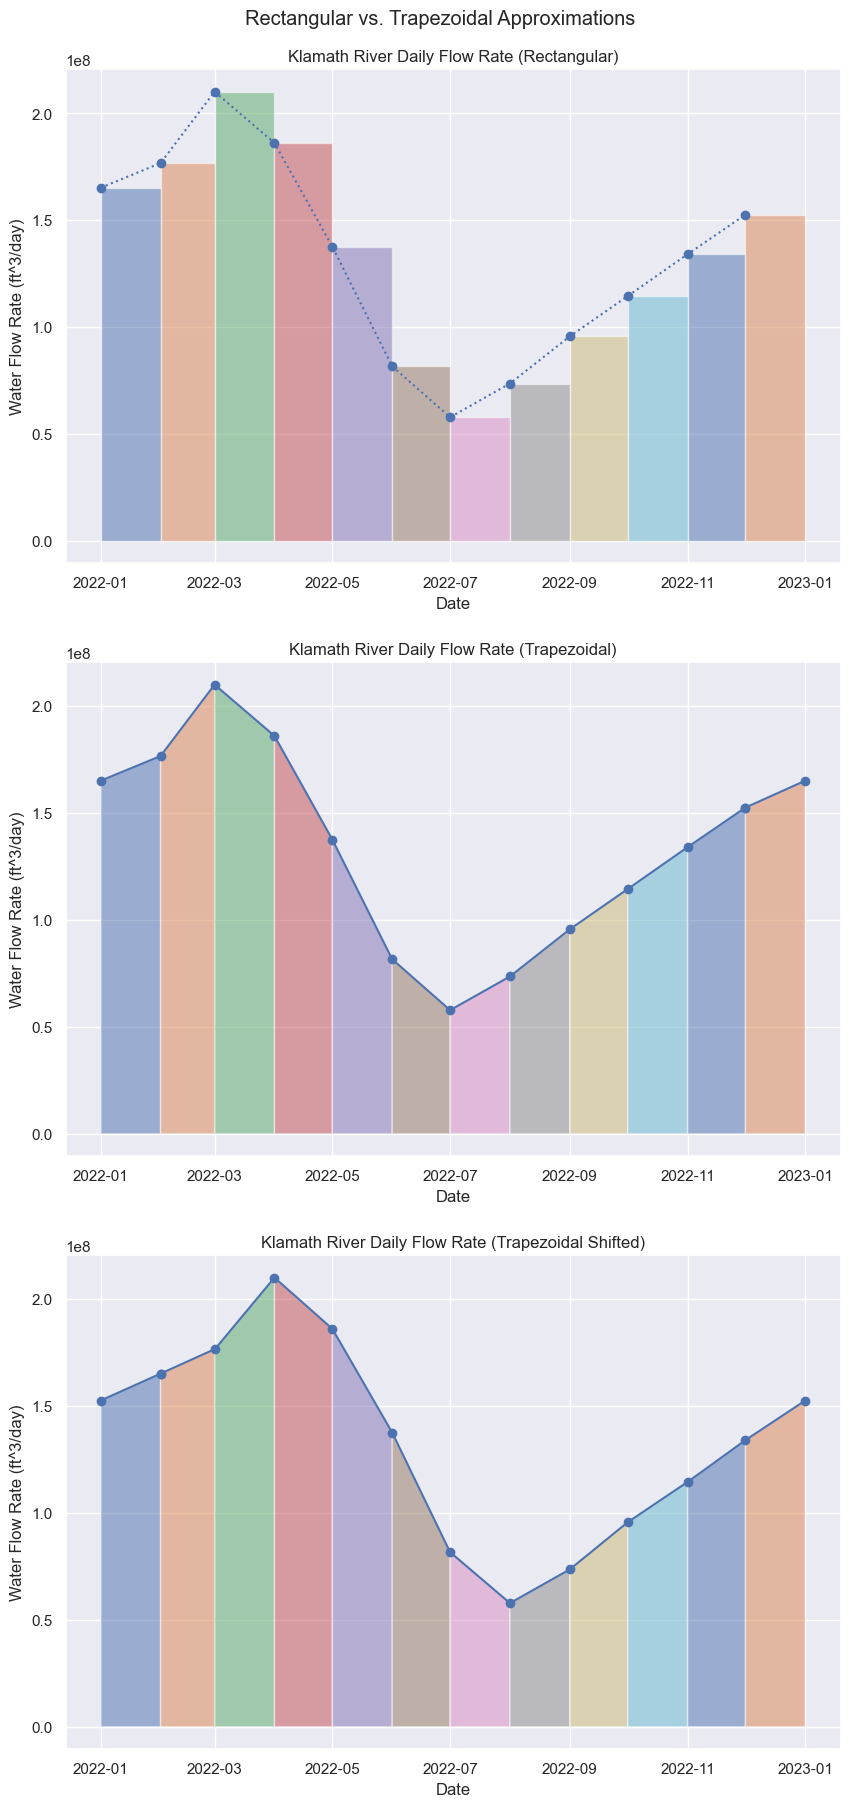

In [16]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))
fig.suptitle("Rectangular vs. Trapezoidal Approximations")
plt.subplots_adjust(top=0.95)

rect_ax, trap_ax, trap_shift_ax = axs.flat

plot_rect_approx(rect_ax)
plot_trap_approx(trap_ax)
plot_trap_shift_approx(trap_shift_ax)

        The rectangular approximation would be most accurate if the daily flow rate is near constant for the month or is close to the average flow rate. The trapezoidal approximation would be most accurate if the daily flow rate was measured closer to the start of the month. The shifted trapezoidal approximation would be most accurate if the daily flow rate was measured closer to the month's end.

# 7. Total Annual Flow w/ Polynomial Regression.

In [17]:
coeffs = np.array([
    2.2434817E-10, -2.5288956E-7, 0.00010598313,
    -0.019872628, 1.557403, -39.387734, 2216.2455
], dtype=np.float64)
exponents = np.arange(6, -1, -1)

coeffs, exponents

(array([ 2.2434817e-10, -2.5288956e-07,  1.0598313e-04, -1.9872628e-02,
         1.5574030e+00, -3.9387734e+01,  2.2162455e+03]),
 array([6, 5, 4, 3, 2, 1, 0]))

In [18]:
integral_exponents = exponents + 1
integral_exponents

array([7, 6, 5, 4, 3, 2, 1])

In [19]:
integral_coeffs = 1 / integral_exponents
integral_coeffs

array([0.14285714, 0.16666667, 0.2       , 0.25      , 0.33333333,
       0.5       , 1.        ])

In [20]:
annual_flow_poly_reg = np.sum(integral_coeffs * coeffs * (365.25 ** integral_exponents)) * SECONDS_PER_DAY
annual_flow_poly_reg

49019985233.77825

# 8. Plot polynomial regression for water flow.

In [21]:
def poly_flow(t):
    y = np.sum(coeffs * (t[:, np.newaxis] ** exponents), axis=1)
    return y

In [22]:
cal_2020 = np.datetime64('2022-01-01') + np.arange(365)
poly_water_flow = poly_flow(np.arange(365, dtype=np.float64)) * SECONDS_PER_DAY

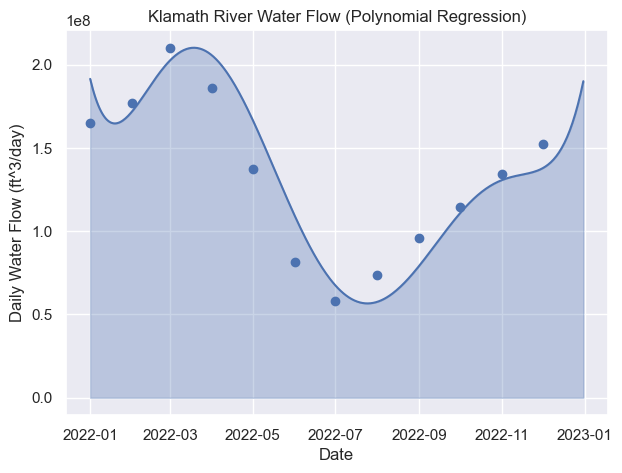

In [23]:
def plot_poly_approx(ax):
    ax.plot(cal_2020, poly_water_flow, 'b-')
    ax.scatter(data["month_start"], data["daily_flow"])

    ax.set(
        title="Klamath River Water Flow (Polynomial Regression)",
        xlabel="Date",
        ylabel="Daily Water Flow (ft^3/day)"
    )

    ax.fill_between(cal_2020, poly_water_flow, color="b", alpha=0.3);
    
fig, ax = plt.subplots(figsize=(7, 5))
plot_poly_approx(ax)

        The polynomial regression fits the data quite well, at least on the interval of 1 year. The regreession fits the increase and decrease of the data well but still misses some points.

# 9. Total Annual Water Flow w/ Trig + Regression.

![Klamath_River_9](Klamath_River_9.jpg)

# 10. Plot trig regression.

In [25]:
a = 1529.403
b = 510.330
c = (2 * np.pi) / 365.25
d = 489.377
e = -47.049
f  = -249.059

def trig_flow(t):
    y = (
        a + (b * np.sin(t * c)) + (d * np.cos(t * c)) +
        (e * np.sin(t * 2 * c)) + (f * np.cos(t * 2 * c))
    )
    return y

In [26]:
cal_2020[:31]

array(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
       '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
       '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
       '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
       '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
       '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
       '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
       '2022-01-29', '2022-01-30', '2022-01-31'], dtype='datetime64[D]')

In [27]:
trig_water_flow = trig_flow(np.arange(365, dtype=np.float64)) * SECONDS_PER_DAY

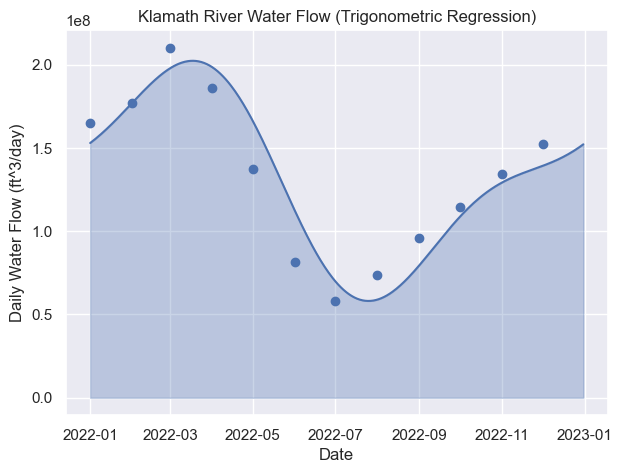

In [28]:
def plot_trig_approx(ax):
    ax.plot(cal_2020, trig_water_flow, 'b-')
    ax.scatter(data["month_start"], data["daily_flow"])

    ax.set(
        title="Klamath River Water Flow (Trigonometric Regression)",
        xlabel="Date",
        ylabel="Daily Water Flow (ft^3/day)"
    )

    ax.fill_between(cal_2020, trig_water_flow, color="b", alpha=0.3);
    
fig, ax = plt.subplots(figsize=(7, 5))
plot_trig_approx(ax)

        The graph fits the data quite well. although the graph is slightly off of the observed points, it represents the 
    data's increase and decrease very well.

# 11. Compare all approximations.

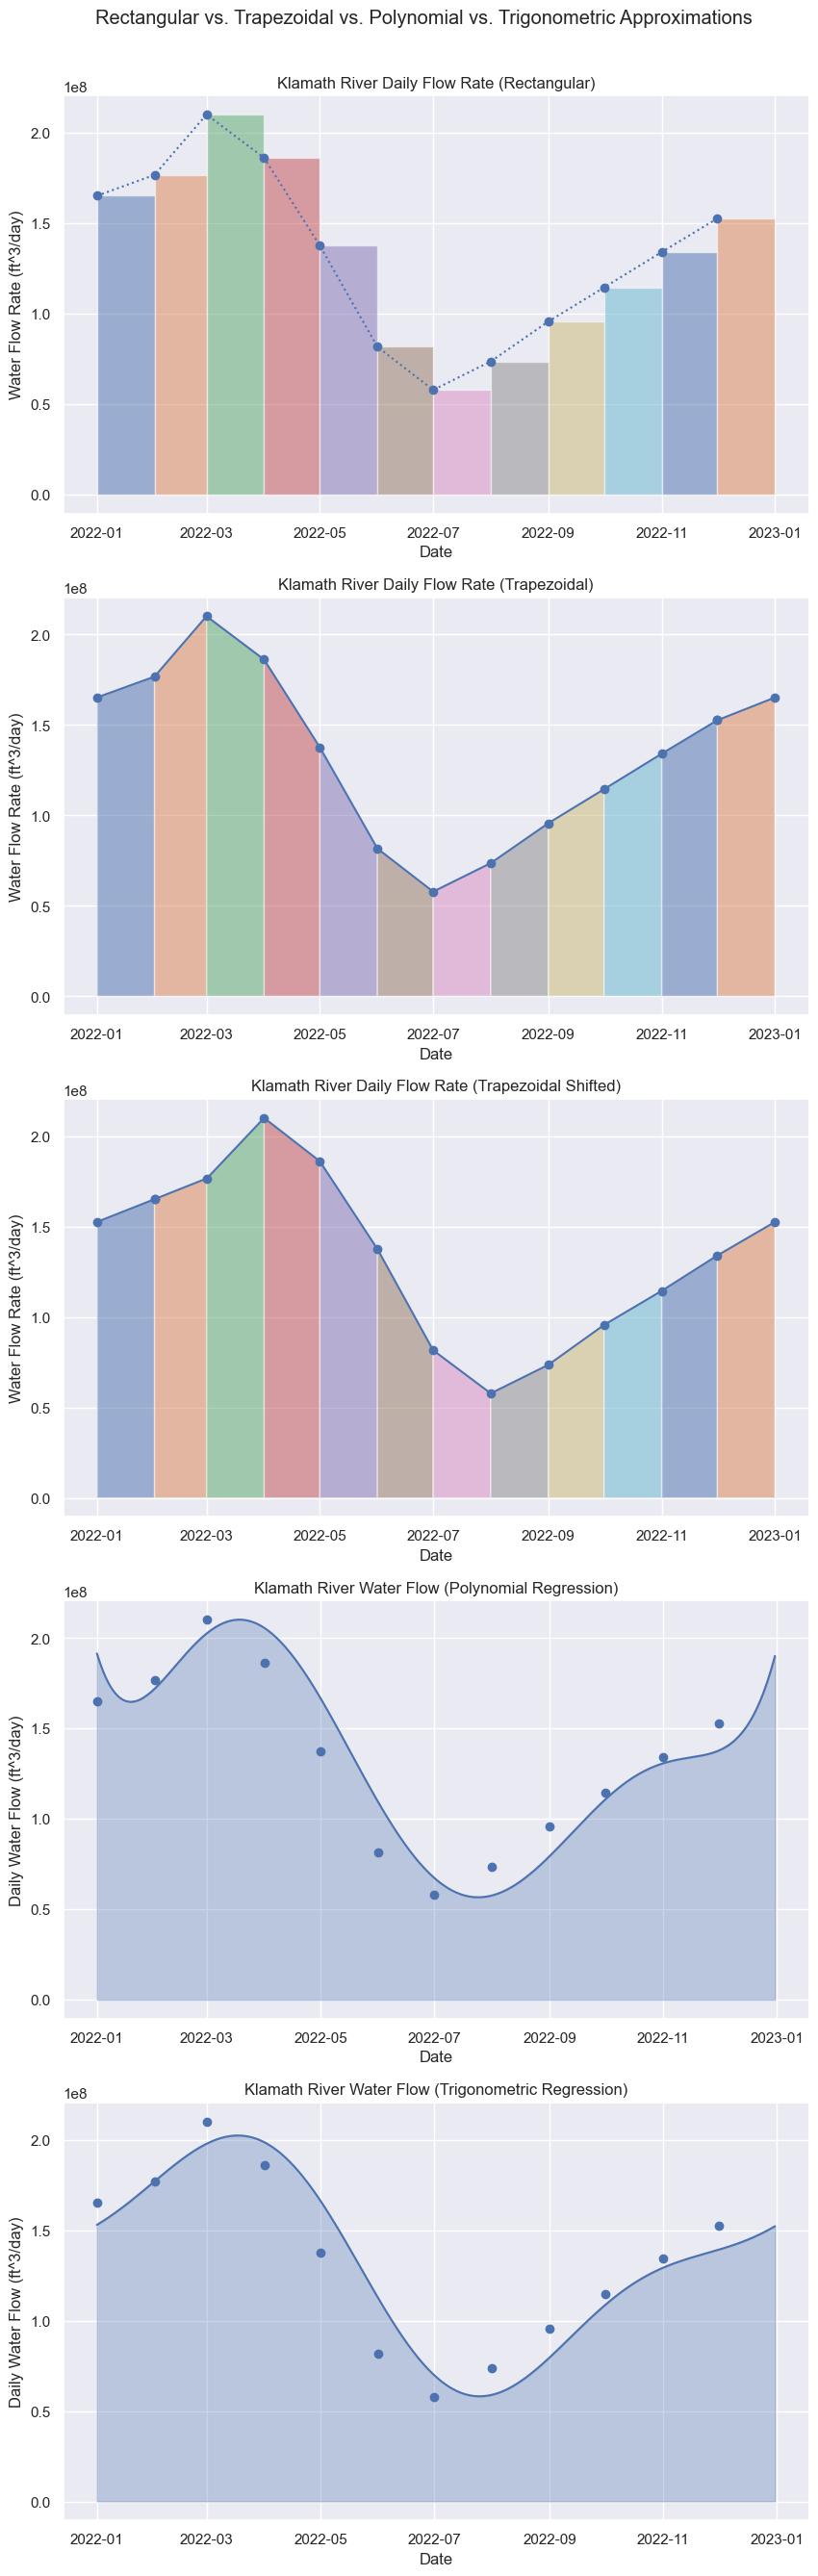

In [29]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 30))
fig.suptitle("Rectangular vs. Trapezoidal vs. Polynomial vs. Trigonometric Approximations")
plt.subplots_adjust(top=0.95)

rect_ax, trap_ax, trap_shift_ax, poly_ax, trig_ax = axs.flat

plot_rect_approx(rect_ax)
plot_trap_approx(trap_ax)
plot_trap_shift_approx(trap_shift_ax)
plot_poly_approx(poly_ax)
plot_trig_approx(trig_ax)

        While the rectangular and two trapezoidal approximations use the acutal data points given, the polynomial and trigonometric regressions do not. That said, the two regression approximations can estimate the daily water flow for every day of the year, while the other approximations only use the 12 data points given. The rectangular and trapezoidal approximations do not represent what the actual daily water flow would look like, since it is very unlikely that rate of daily water flow increase is constant and happens to change at the end of each month. The smooth graphs of the regressions much more closely represent how the water flow changes day-to-day. However, the regressions miss the actual data points, meaning that they don't actually reflect the Klamath River's daily water flow. I would recommend that the managers of the Klamath River collect more data to train their regressions on. This would lead to better regression approximations of the Klamath River's water flow. For now, I would still recommend that they use a regression, I don't think it truly matters trigonometric or polynomial since the two are very similar, to be able to see the continuous changes in daily water flow rather than the discrete changes that the rectangular and trapezoidal approximations show. Using the regression estimates, they can observe the high-level data trends, see where the daily water flow is increasing, decreasing, its minimum, maximum, and much more.